# Global Capital Markets Project
Project by Alexander Jermann, Columbia University under supervision of Prof. Dr. Siddhartha Dastidar, Columbia University

*Note: This notebook is the second part of a two part series. Please refer to Notebook 1 for the first part.*




### 1. Prepare Data for Model

In [2]:
from quantopian.research import run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.filters import QTradableStocksUS

import alphalens

As the first step we import the factor data that we saved in a CSV file in the previous notebook. To do that Quantopian has a page called Self-Serve Data that allows you to upload your own data. Once that is done, we can import it into our environment using the following command. For more on importing data using Self-Serve, check out the examples in [this forum post](https://www.quantopian.com/posts/upload-your-custom-datasets-and-signals-with-self-serve-data). The data we upload is saved in the github repository in the data folder and is titled `lazy_prices_data.csv`

In [3]:
from quantopian.pipeline.data.user_5b5ea3e147c3ff0043f28115 import lazy_prices_2015_2018

To use the data we use a Pipeline, which provides a tool for cross-sectional analysis of asset data. It allows us to make computation for many assets at the same time. In our case we use the similarity scores for many assets over time to rank assets.

In [4]:
def make_pipeline():
    
    jaccard_score = lazy_prices_2015_2018.jaccard_score.latest
    cosine_score = lazy_prices_2015_2018.cosine_score.latest
    
    screen = (QTradableStocksUS() & jaccard_score.notnull() & cosine_score.notnull())
    
    return Pipeline(columns={'jaccard_score': jaccard_score, 'cosine_score': cosine_score}, screen=screen)

We create two datasets one between 

In [5]:
data = run_pipeline(make_pipeline(), '2015-01-01', '2018-01-01')

In [6]:
data.tail(10)

cosine_score  jaccard_score
2018-01-02 00:00:00+00:00 Equity(50310 [DFIN])      0.773923       0.631219
                          Equity(50312 [LKSD])      0.759163       0.609053
                          Equity(50320 [ELF])       0.854101       0.740132
                          Equity(50350 [COUP])      0.727309       0.548890
                          Equity(50361 [ADSW])      0.871912       0.772911
                          Equity(50366 [CWH])       0.604587       0.394254
                          Equity(50368 [XOG])       0.806468       0.675054
                          Equity(50376 [CDEV])      0.612506       0.436896
                          Equity(50398 [FRTA])      0.792387       0.656128
                          Equity(50533 [CNDT])      0.784652       0.641971

### 2. Prices of Assets

In [7]:
assets = data.index.levels[1]

In [8]:
pricing_end_date = '2018-08-01' # End date of pricing later so we can get future returns
prices = get_pricing(assets,
                     start_date='2015-01-01',
                     end_date=pricing_end_date,
                     fields='open_price')

### 3. Factor Predictiveness Analysis
#### 3.1 Jaccard Factor

In [27]:
jaccard_factor = data[['jaccard_score']]

In [28]:
factor_data_j = alphalens.utils.get_clean_factor_and_forward_returns(
    jaccard_factor,
    prices=prices,
    quantiles=5,
    periods =(30, 60, 90),
)

Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.058986,0.617053,0.479202,0.108507,213065,20.028313
2,0.584740,0.711563,0.653385,0.029964,212617,19.986201
3,0.687982,0.760984,0.728453,0.016805,212614,19.985919
4,0.748986,0.812557,0.778404,0.014801,212607,19.985261
5,0.797175,0.936800,0.839111,0.025475,212916,20.014307


Returns Analysis


,30D,60D,90D
Ann. alpha,0.025,0.021,0.018
beta,-0.060,-0.063,-0.054
Mean Period Wise Return Top Quantile (bps),18.231,20.380,20.392
Mean Period Wise Return Bottom Quantile (bps),-28.702,-24.029,-21.089
Mean Period Wise Spread (bps),46.933,44.362,41.428


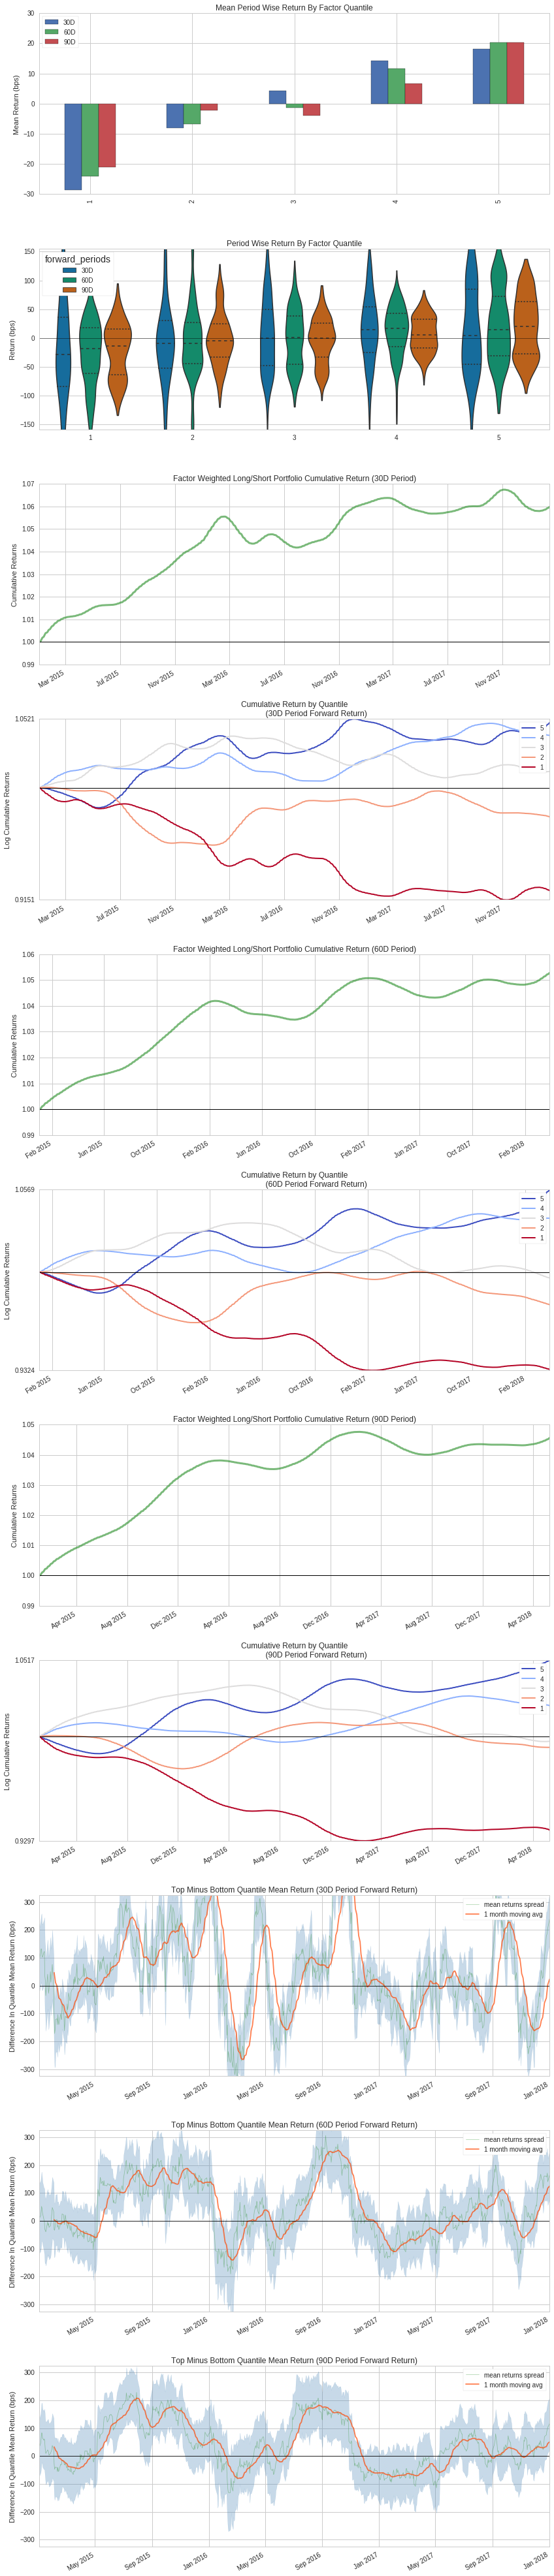

Information Analysis


,30D,60D,90D
IC Mean,0.020,0.028,0.030
IC Std.,0.047,0.041,0.039
Risk-Adjusted IC,0.425,0.684,0.760
t-stat(IC),11.698,18.816,20.887
p-value(IC),0.000,0.000,0.000
IC Skew,-0.334,0.178,0.269
IC Kurtosis,-0.031,-0.681,-0.857


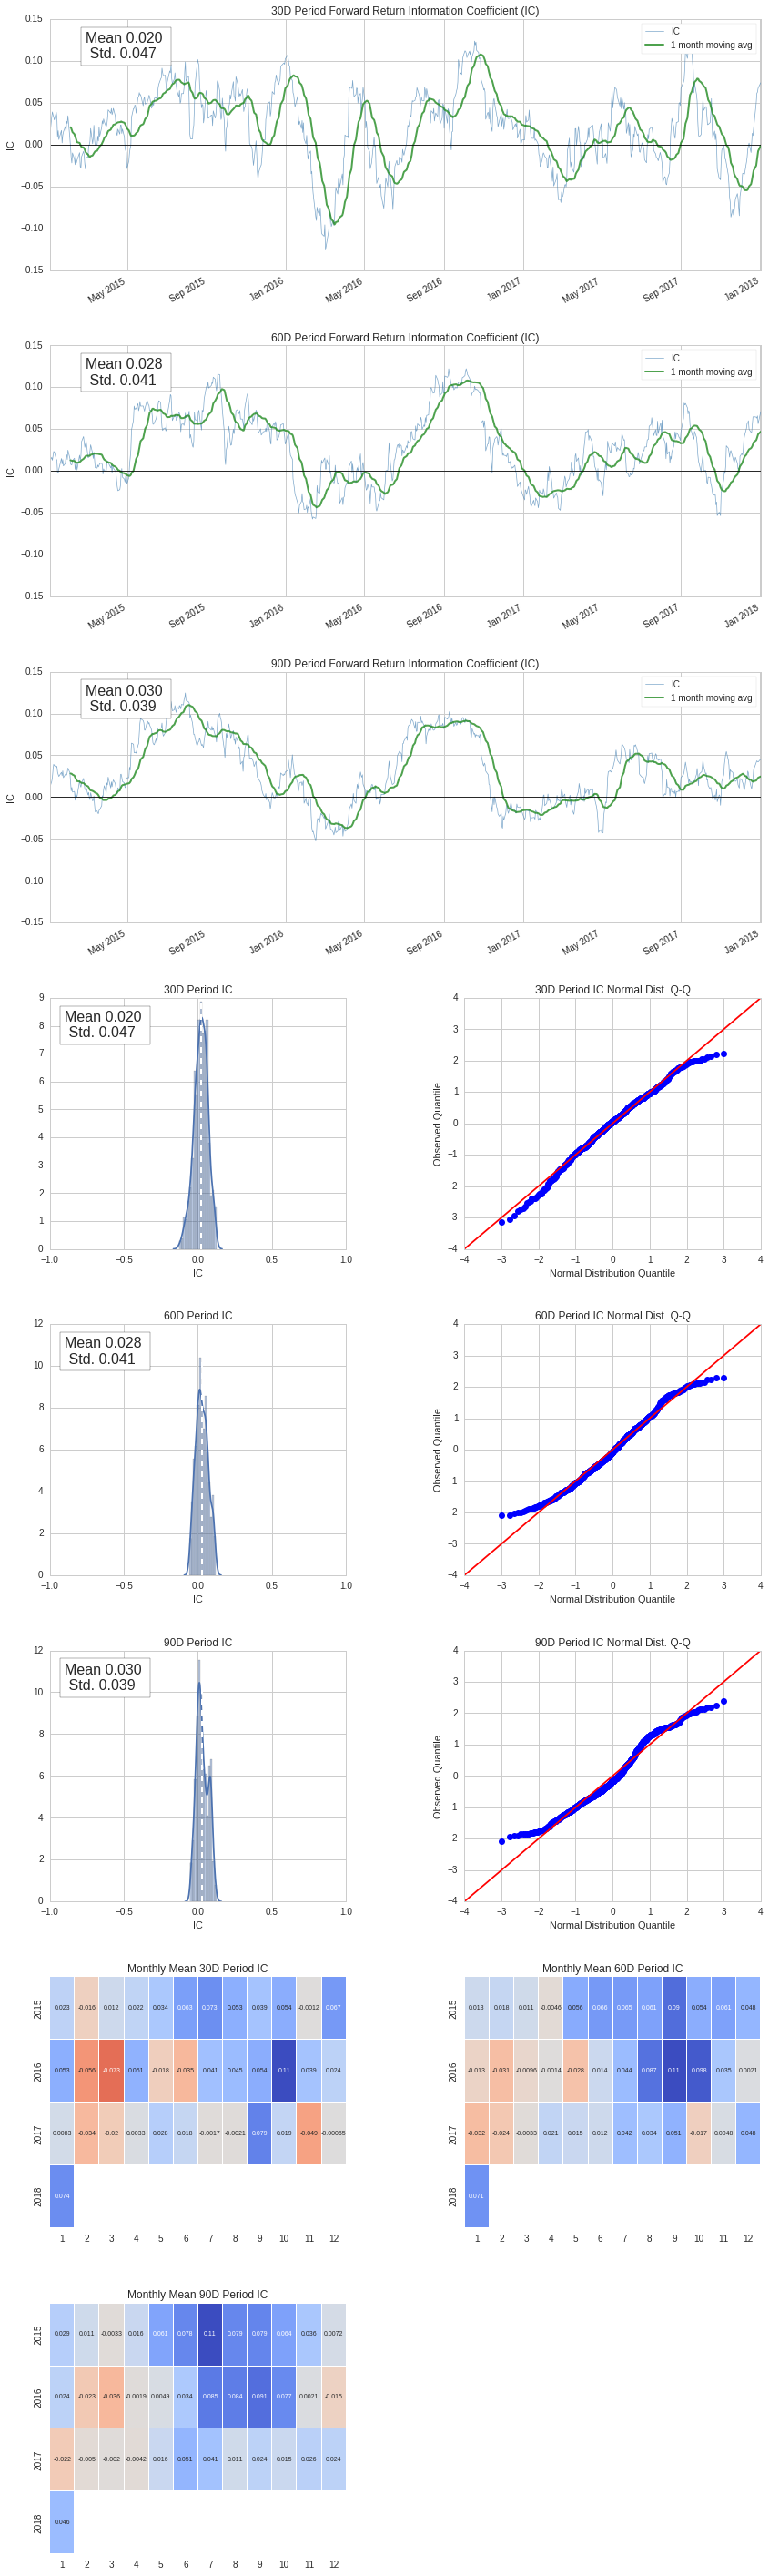

Turnover Analysis


,30D,60D,90D
Quantile 1 Mean Turnover,0.220,0.418,0.509
Quantile 2 Mean Turnover,0.257,0.479,0.569
Quantile 3 Mean Turnover,0.247,0.463,0.558
Quantile 4 Mean Turnover,0.239,0.449,0.541
Quantile 5 Mean Turnover,0.173,0.329,0.402


,30D,60D,90D
Mean Factor Rank Autocorrelation,0.827,0.652,0.571


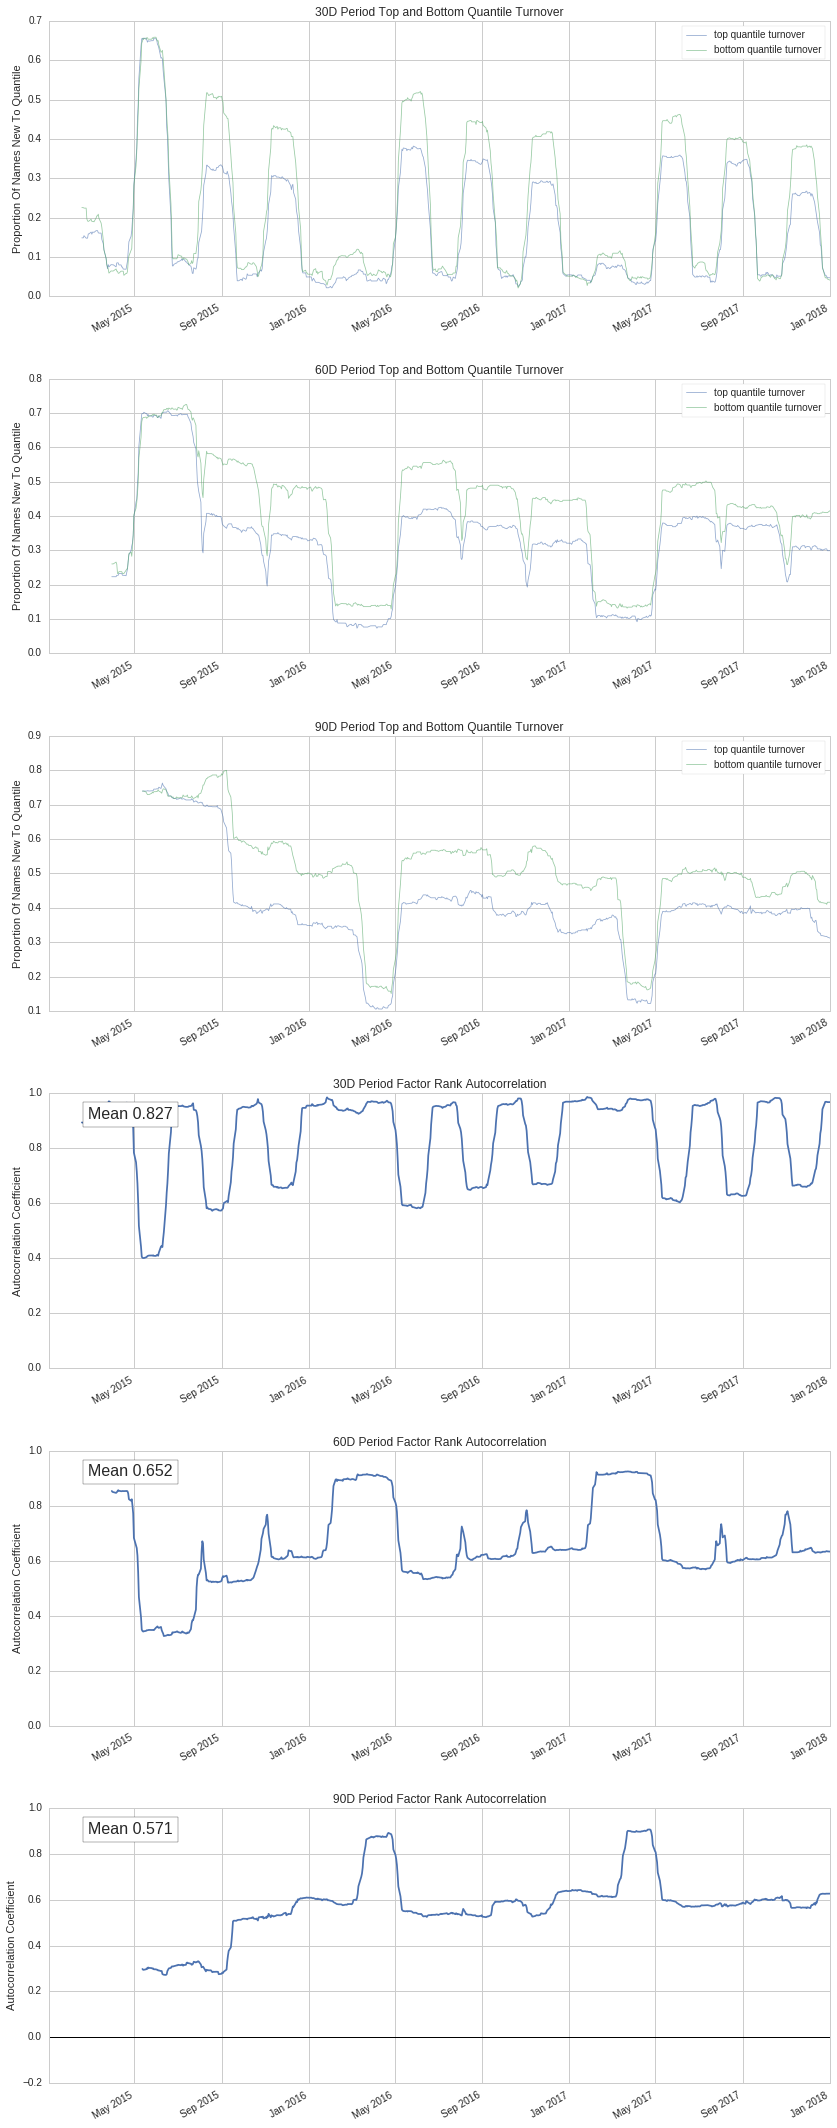

In [29]:
alphalens.tears.create_full_tear_sheet(factor_data_j, by_group=False);

### 3.2 Cosine Factor

In [9]:
cosine_factor = data[['cosine_score']]

In [10]:
factor_data_c3 = alphalens.utils.get_clean_factor_and_forward_returns(
    cosine_factor,
    prices=prices,
    quantiles=5,
    periods =(30, 60, 90),
)

Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.236408,0.767642,0.663874,0.092597,213065,20.028313
2,0.744706,0.831777,0.793650,0.020593,212617,19.986201
3,0.817089,0.865000,0.843825,0.010916,212606,19.985167
4,0.857090,0.896678,0.875717,0.009240,212615,19.986013
5,0.887518,0.967373,0.912464,0.014885,212916,20.014307


Returns Analysis


,30D,60D,90D
Ann. alpha,0.024,0.021,0.018
beta,-0.061,-0.065,-0.057
Mean Period Wise Return Top Quantile (bps),19.503,21.346,20.886
Mean Period Wise Return Bottom Quantile (bps),-33.839,-29.379,-25.643
Mean Period Wise Spread (bps),53.342,50.683,46.468


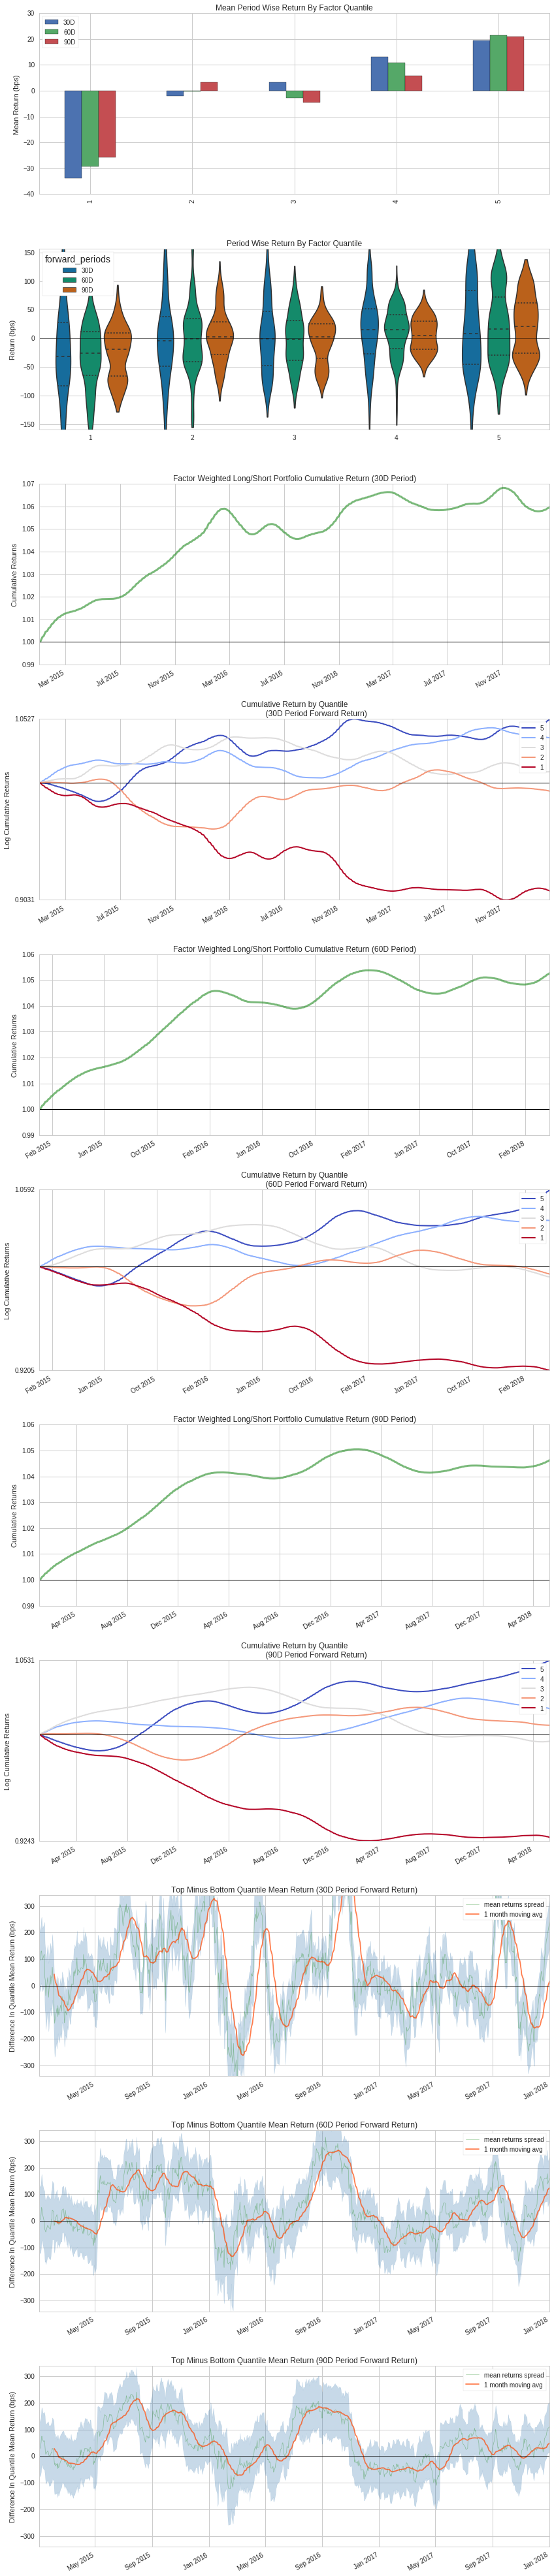

Information Analysis


,30D,60D,90D
IC Mean,0.020,0.028,0.030
IC Std.,0.047,0.041,0.040
Risk-Adjusted IC,0.427,0.685,0.765
t-stat(IC),11.730,18.842,21.032
p-value(IC),0.000,0.000,0.000
IC Skew,-0.331,0.184,0.281
IC Kurtosis,-0.069,-0.682,-0.864


/venvs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


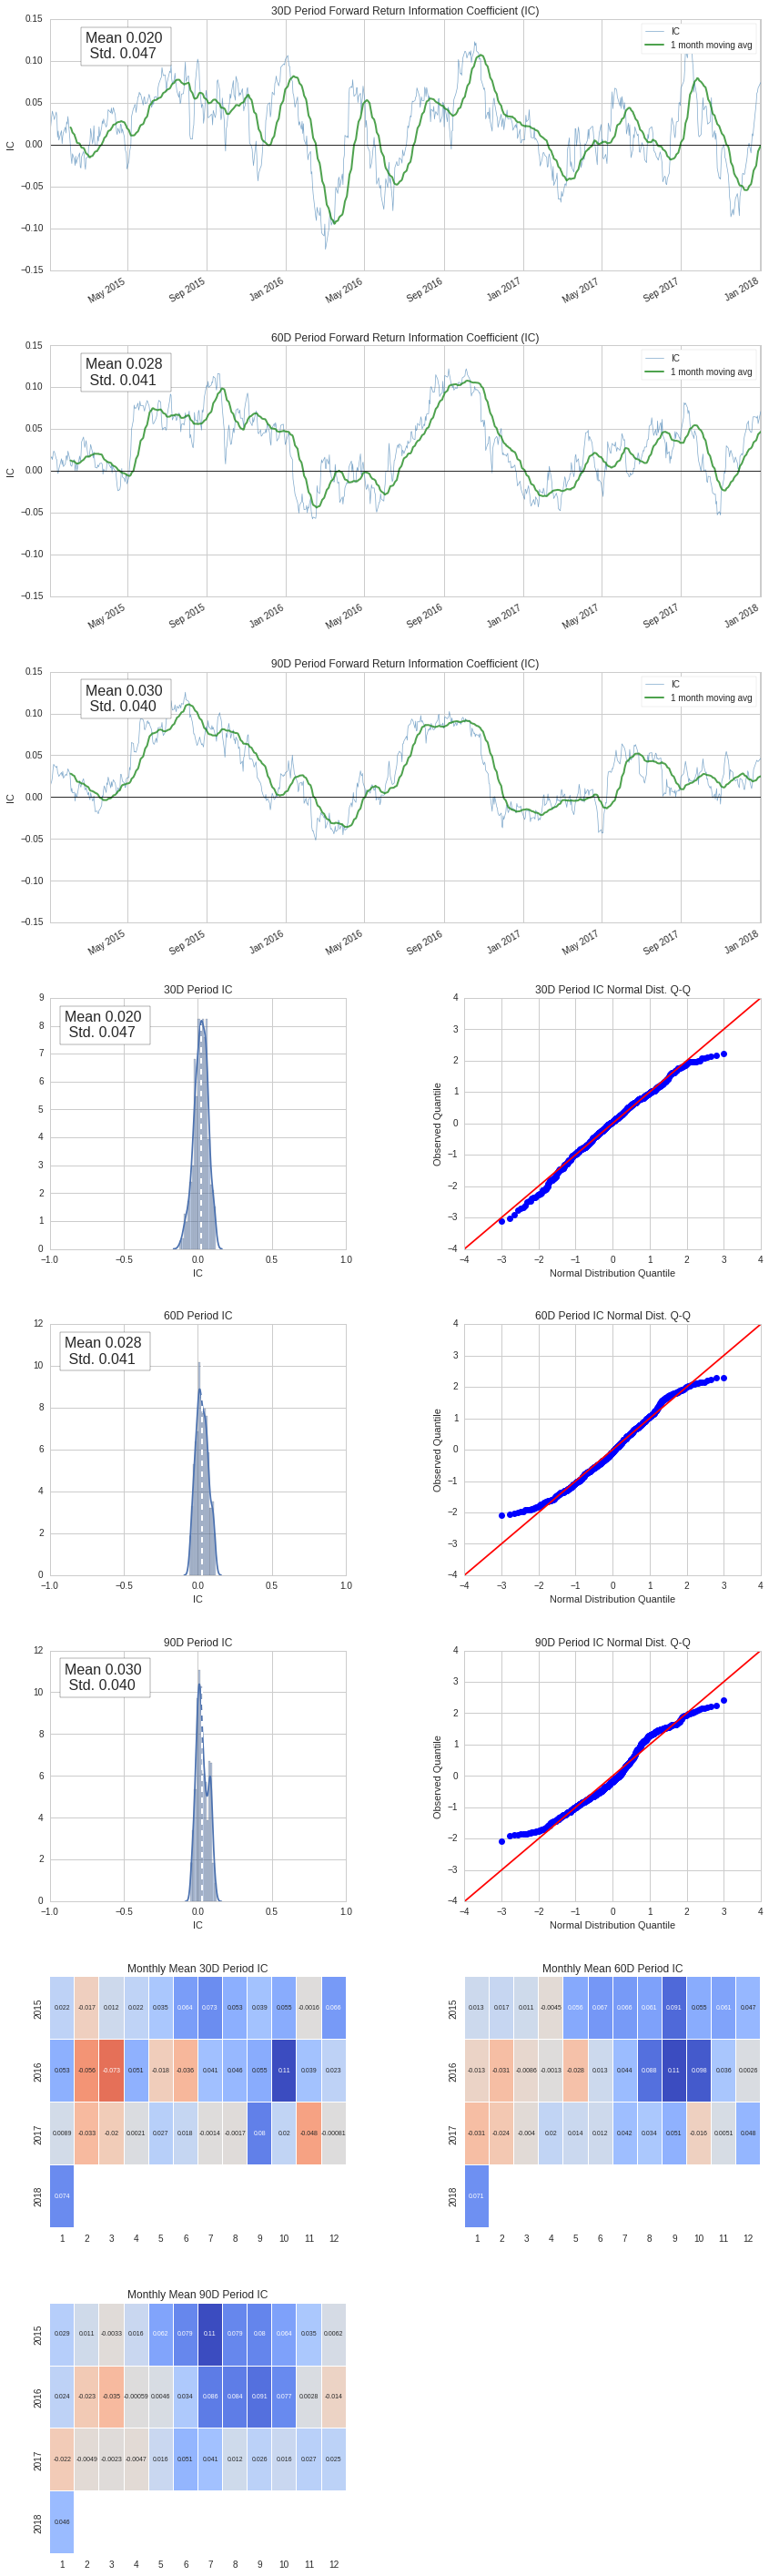

Turnover Analysis


,30D,60D,90D
Quantile 1 Mean Turnover,0.217,0.414,0.506
Quantile 2 Mean Turnover,0.257,0.480,0.571
Quantile 3 Mean Turnover,0.248,0.465,0.561
Quantile 4 Mean Turnover,0.240,0.449,0.540
Quantile 5 Mean Turnover,0.173,0.329,0.402


,30D,60D,90D
Mean Factor Rank Autocorrelation,0.83,0.657,0.577


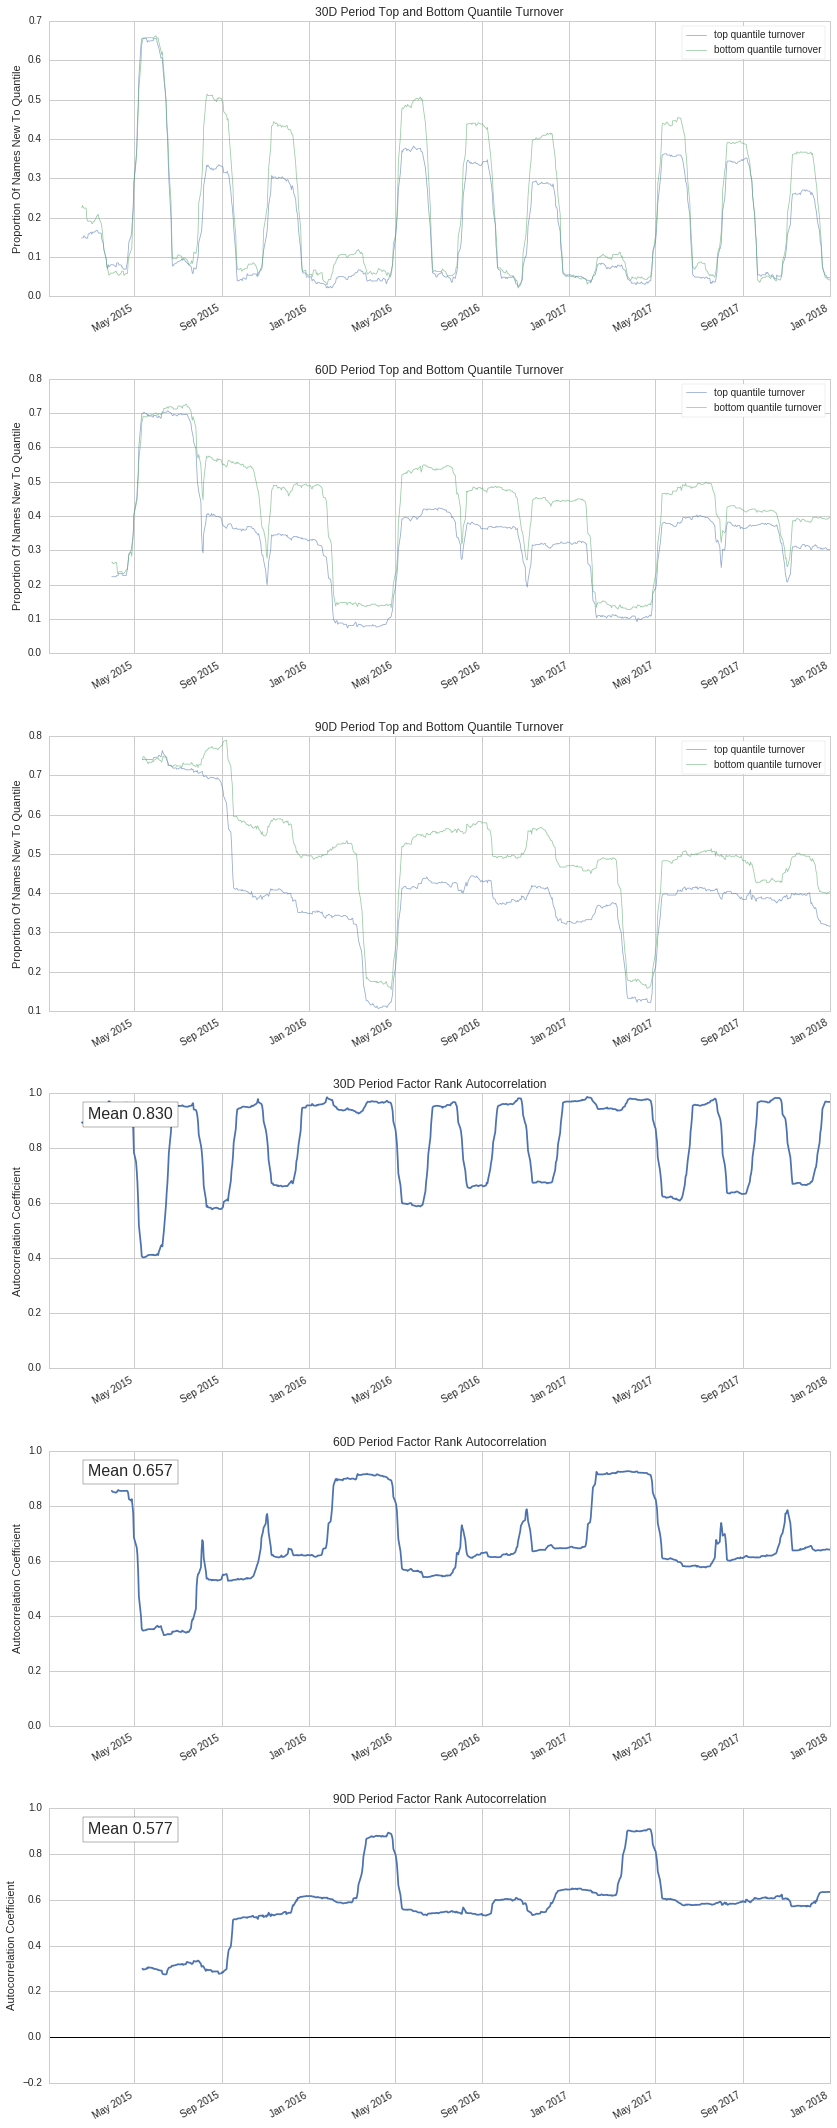

In [11]:
alphalens.tears.create_full_tear_sheet(factor_data_c3, by_group=False);

## Resources

This notebook follows the code from: https://www.quantopian.com/posts/analyzing-alpha-in-10-ks-and-10-qs